In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

In [2]:
from subprocess import check_output
print(check_output(['ls','../']).decode('utf8'))

Machine-Learning-Masterclass-master
TensorFlow-Tutorials
datasciencefromscratch
flask_app
hands_onMachinelearning
installation
kaggle
learnPython
pythonMachineLearning
quicksort_heapsort_mergesort.ipynb
tensorflow



In [3]:
train_df=pd.read_csv('data/zillow/train_2016_v2.csv',parse_dates=['transactiondate'])

In [4]:
train_df.columns

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')

In [5]:
print(train_df.shape)
train_df.head()

(90275, 3)


,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [6]:
train_df.logerror.sort_values(ascending=False)

7318     4.737
22476    4.520
22475    4.445
8612     3.968
87343    3.443
69178    3.436
10702    3.403
38586    3.289
54844    3.250
62294    3.174
60643    3.160
13425    3.115
60333    3.082
2653     3.018
17060    2.987
18923    2.953
7637     2.926
7374     2.809
72262    2.762
77602    2.758
4883     2.745
13639    2.623
10151    2.560
71651    2.552
63515    2.548
12176    2.544
3534     2.489
41689    2.485
17161    2.457
54728    2.454
         ...  
24193   -2.293
44787   -2.293
43888   -2.293
12549   -2.303
7242    -2.303
30074   -2.313
65476   -2.313
68205   -2.313
49442   -2.313
35691   -2.313
2593    -2.313
59697   -2.313
58436   -2.323
36976   -2.323
45569   -2.323
3371    -2.333
59646   -2.333
13531   -2.354
65072   -2.354
41584   -2.354
13447   -2.365
43989   -2.365
23511   -2.375
65596   -2.397
53882   -2.688
6688    -2.976
2079    -3.194
88788   -4.510
69228   -4.605
6416    -4.605
Name: logerror, Length: 90275, dtype: float64

In [9]:
tt=train_df[0:50]
type(tt)

pandas.core.frame.DataFrame

In [11]:
tt.sort_values(by="logerror")

,parcelid,logerror,transactiondate
5,11509835,-0.2705,2016-01-02
24,13957980,-0.1696,2016-01-03
1,14366692,-0.1684,2016-01-01
44,11708989,-0.0910,2016-01-03
26,11188425,-0.0747,2016-01-03
29,12524725,-0.0534,2016-01-03
39,14022972,-0.0481,2016-01-03
14,14148540,-0.0450,2016-01-03
25,12752047,-0.0440,2016-01-03
17,12524288,-0.0419,2016-01-03


In [14]:
tt.groupby("parcelid").mean()

,logerror
parcelid,
10777209,-0.0222
10805063,0.0010
10812783,0.0402
10815909,0.0100
10854446,0.3825
10949761,0.0344
10984360,0.0411
11016594,0.0276
11024002,0.0266


In [17]:
import matplotlib as mpl
mpl.style.use("ggplot")

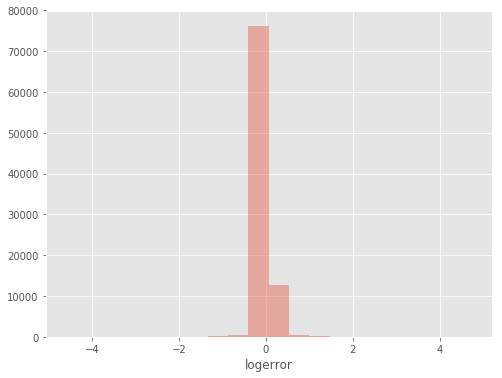

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(train_df.logerror, kde=False, bins=20)

In [20]:
sorted(tt.logerror)

[-0.27050000000000002,
 -0.1696,
 -0.16839999999999999,
 -0.090999999999999998,
 -0.074700000000000003,
 -0.053400000000000003,
 -0.048099999999999997,
 -0.044999999999999998,
 -0.044000000000000004,
 -0.0419,
 -0.040800000000000003,
 -0.039800000000000002,
 -0.038699999999999998,
 -0.036700000000000003,
 -0.029399999999999999,
 -0.027400000000000001,
 -0.023300000000000001,
 -0.022200000000000001,
 -0.0161,
 -0.0060000000000000001,
 -0.0050000000000000001,
 -0.0040000000000000001,
 -0.0030000000000000001,
 -0.002,
 -0.001,
 0.001,
 0.002,
 0.0080000000000000002,
 0.01,
 0.0149,
 0.020799999999999999,
 0.0218,
 0.0218,
 0.023699999999999999,
 0.026599999999999999,
 0.0276,
 0.0344,
 0.0402,
 0.041099999999999998,
 0.041099999999999998,
 0.044000000000000004,
 0.044000000000000004,
 0.044999999999999998,
 0.044999999999999998,
 0.052600000000000001,
 0.081600000000000006,
 0.0843,
 0.11509999999999999,
 0.1638,
 0.38250000000000001]

In [25]:
type(sorted(train_df.logerror))

list

In [24]:
type(train_df.logerror.sort_values())

pandas.core.series.Series

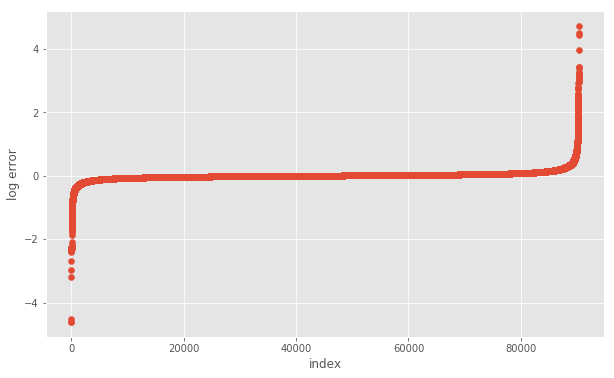

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(train_df.shape[0]), sorted(train_df.logerror))
plt.xlabel('index')
plt.ylabel('log error')

In [30]:
pd.cut(train_df.logerror, bins=4, labels=['g1','g2','g3','g4'])

0        g2
1        g2
2        g2
3        g2
4        g2
5        g2
6        g2
7        g3
8        g2
9        g3
10       g3
11       g2
12       g2
13       g3
14       g2
15       g2
16       g2
17       g2
18       g2
19       g2
20       g2
21       g2
22       g2
23       g3
24       g2
25       g2
26       g2
27       g2
28       g2
29       g2
         ..
90245    g3
90246    g2
90247    g3
90248    g2
90249    g2
90250    g2
90251    g2
90252    g2
90253    g2
90254    g2
90255    g2
90256    g2
90257    g2
90258    g3
90259    g2
90260    g2
90261    g2
90262    g2
90263    g3
90264    g2
90265    g2
90266    g2
90267    g2
90268    g2
90269    g2
90270    g2
90271    g2
90272    g2
90273    g2
90274    g3
Name: logerror, Length: 90275, dtype: category
Categories (4, object): [g1 < g2 < g3 < g4]

In [33]:
qcut=pd.qcut(train_df.logerror, q=3)
qcut.value_counts()

(-4.606, -0.0131]    30249
(0.0247, 4.737]      30033
(-0.0131, 0.0247]    29993
Name: logerror, dtype: int64

In [35]:
ulimit = np.percentile(train_df.logerror, 99)
llimit = np.percentile(train_df.logerror, 1)
print(llimit, ulimit)

-0.3425 0.463882


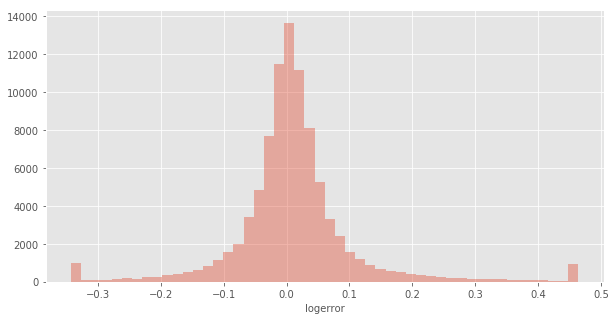

In [37]:
train_df.logerror[train_df.logerror>ulimit]=ulimit
train_df.logerror[train_df.logerror<llimit]=llimit
plt.figure(figsize=(10,5))
sns.distplot(train_df.logerror, bins=50, kde=False)
plt.xlabel('logerror', fontsize=10)

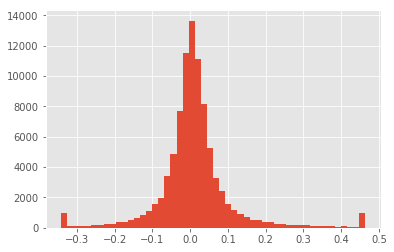

In [38]:
train_df.logerror.hist(bins=50)

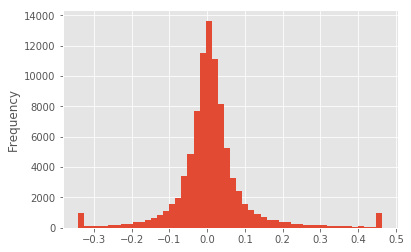

In [39]:
train_df.logerror.plot.hist(bins=50)

In [41]:
train_df.transactiondate.dt.month

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
90245    12
90246    12
90247    12
90248    12
90249    12
90250    12
90251    12
90252    12
90253    12
90254    12
90255    12
90256    12
90257    12
90258    12
90259    12
90260    12
90261    12
90262    12
90263    12
90264    12
90265    12
90266    12
90267    12
90268    12
90269    12
90270    12
90271    12
90272    12
90273    12
90274    12
Name: transactiondate, Length: 90275, dtype: int64

In [42]:
cnt=train_df.transactiondate.dt.month.value_counts()
cnt

6     10922
8     10476
5      9961
7      9947
9      9575
4      9311
3      8652
1      6556
2      6333
10     4977
11     1826
12     1739
Name: transactiondate, dtype: int64

In [43]:
train_df['transaction_month']=train_df.transactiondate.dt.month

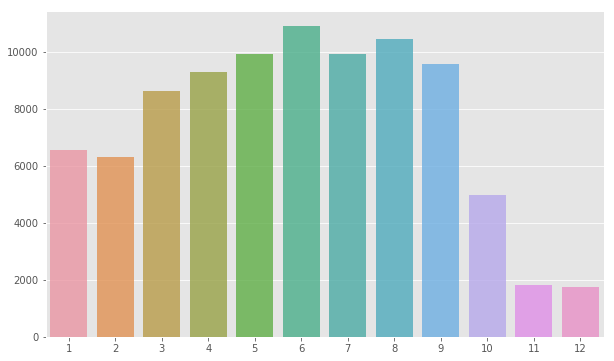

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(cnt.index, cnt.values, alpha=0.8)

In [45]:
train_df.parcelid.value_counts()

11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
10798910    2
14678446    2
12689560    2
10796614    2
14316410    2
11633771    2
12023571    2
14667297    2
14294516    2
12715657    2
14444102    2
14022812    2
12978851    2
14057417    2
11135845    2
11477350    2
11146377    2
11866315    2
11602482    2
14500952    2
           ..
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12031384    1
14130585    1
12027290    1
12862962    1
12756350    1
17197466    1
11046267    1
10910830    1
14202253    1
11038055    1
11104576    1
17265761    1
12858732    1
14604356    1
12068206    1
14210190    1
14736753    1
14599538    1
14601587    1
14613877    1
11199862    1
11726199    1
12096888    1
11181433    1
12438686    1
Name: parcelid, Length: 90150, dtype: int64

In [46]:
train_df.parcelid.value_counts().reset_index()

,index,parcelid
0,11842707,3
1,12613442,2
2,12032773,2
3,11729067,2
4,11845988,2
5,14753974,2
6,12779635,2
7,11188497,2
8,10883535,2
9,10790468,2


In [47]:
train_df.parcelid.value_counts().reset_index()['parcelid'].value_counts()

1    90026
2      123
3        1
Name: parcelid, dtype: int64

In [49]:
prop_df=pd.read_csv('data/zillow/properties_2016.csv')

In [50]:
prop_df.dtypes

parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                   object
heatingorsystemtypeid           float64
latitude                        float64


In [51]:
prop_df.shape

(2985217, 58)

In [52]:
prop_df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [53]:
prop_df.isnull().sum()

parcelid                              0
airconditioningtypeid           2173698
architecturalstyletypeid        2979156
basementsqft                    2983589
bathroomcnt                       11462
bedroomcnt                        11450
buildingclasstypeid             2972588
buildingqualitytypeid           1046729
calculatedbathnbr                128912
decktypeid                      2968121
finishedfloor1squarefeet        2782500
calculatedfinishedsquarefeet      55565
finishedsquarefeet12             276033
finishedsquarefeet13            2977545
finishedsquarefeet15            2794419
finishedsquarefeet50            2782500
finishedsquarefeet6             2963216
fips                              11437
fireplacecnt                    2672580
fullbathcnt                      128912
garagecarcnt                    2101950
garagetotalsqft                 2101950
hashottuborspa                  2916203
heatingorsystemtypeid           1178816
latitude                          11437


In [55]:
train_df.isnull().any()

parcelid             False
logerror             False
transactiondate      False
transaction_month    False
dtype: bool

In [56]:
missing_df=prop_df.isnull().sum().reset_index()
missing_df.columns=['column_name','missing_count']
missing_df.head()

,column_name,missing_count
0,parcelid,0
1,airconditioningtypeid,2173698
2,architecturalstyletypeid,2979156
3,basementsqft,2983589
4,bathroomcnt,11462


In [59]:
missing_df.sort_values(by='missing_count', ascending=False)

,column_name,missing_count
41,storytypeid,2983593
3,basementsqft,2983589
46,yardbuildingsqft26,2982570
49,fireplaceflag,2980054
2,architecturalstyletypeid,2979156
43,typeconstructiontypeid,2978470
13,finishedsquarefeet13,2977545
6,buildingclasstypeid,2972588
9,decktypeid,2968121
16,finishedsquarefeet6,2963216


In [60]:
missing_df=missing_df[missing_df.missing_count>0]
missing_df=missing_df.sort_values(by='missing_count')
missing_df.head()

,column_name,missing_count
35,rawcensustractandblock,11437
25,longitude,11437
24,latitude,11437
37,regionidcounty,11437
17,fips,11437


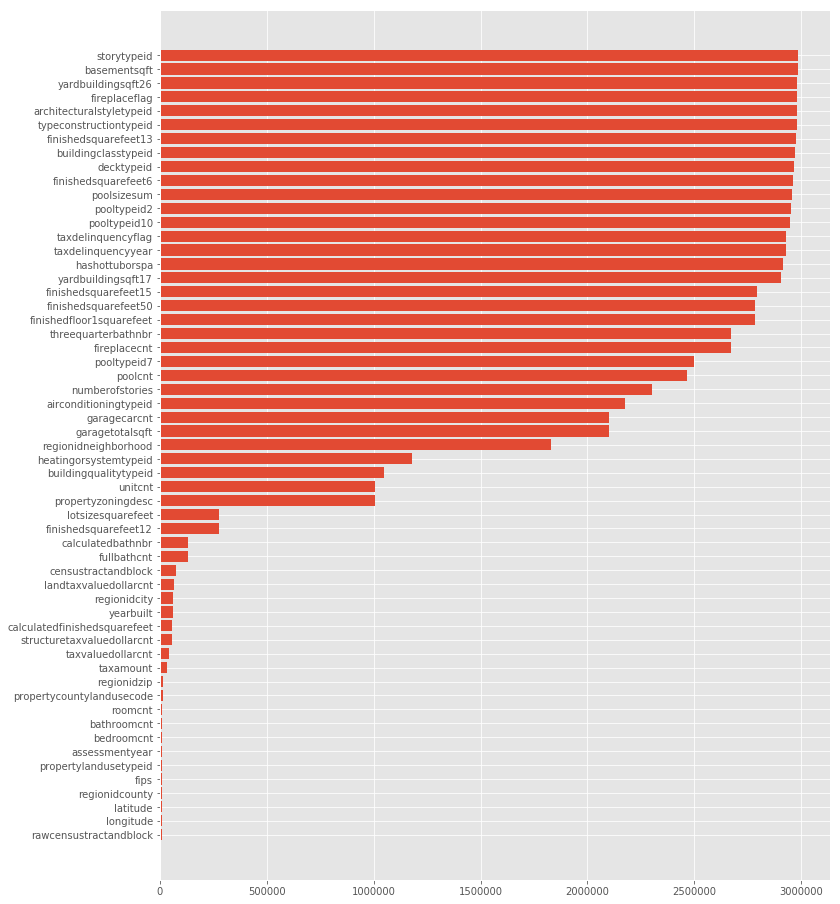

In [62]:
f, ax=plt.subplots(figsize=(12,16))
plt.barh(np.arange(missing_df.shape[0]), missing_df.missing_count)
plt.yticks(np.arange(missing_df.shape[0]),missing_df.column_name.values)
plt.show()


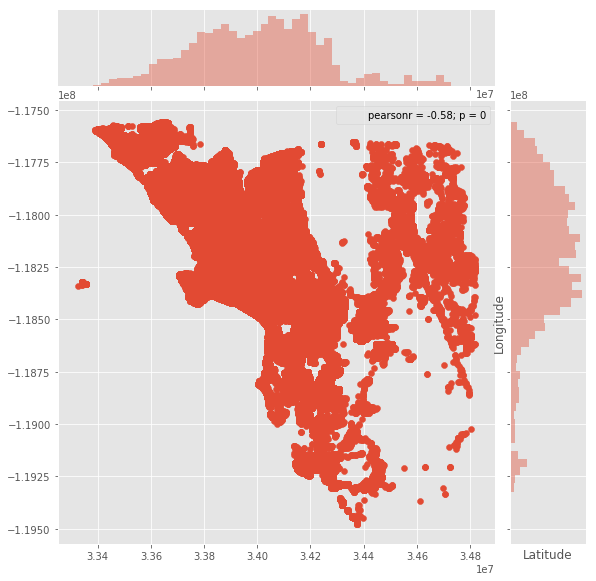

In [63]:
plt.figure(figsize=(10,10))
sns.jointplot(prop_df.latitude.values, prop_df.longitude.values, size=8 )
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [64]:
prop_df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [65]:
train_df=pd.merge(train_df, prop_df, on='parcelid', how='left')
train_df.sample(5)

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
40000,12894008,-0.0790,2016-05-27,5,NaN,NaN,NaN,1.0,3.0,NaN,...,NaN,NaN,118888.0,301537.0,2015.0,182649.0,3870.69,NaN,NaN,6.037402e+13
24846,14662518,-0.0080,2016-04-13,4,NaN,NaN,NaN,2.5,4.0,NaN,...,NaN,NaN,285078.0,754827.0,2015.0,469749.0,11747.92,NaN,NaN,6.059052e+13
66830,10909492,-0.0263,2016-08-16,8,NaN,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,203996.0,1019980.0,2015.0,815984.0,12493.38,NaN,NaN,6.037144e+13
79748,12149777,-0.0020,2016-09-27,9,NaN,NaN,NaN,3.0,3.0,NaN,...,NaN,NaN,108451.0,135765.0,2015.0,27314.0,1650.03,NaN,NaN,6.037300e+13
69357,13842262,-0.0576,2016-08-24,8,NaN,NaN,NaN,1.0,2.0,NaN,...,1.0,NaN,29394.0,276644.0,2015.0,247250.0,3479.96,NaN,NaN,6.059075e+13


In [66]:
train_df.dtypes

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
transaction_month                        int64
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt 

In [67]:
train_df.shape

(90275, 61)

In [68]:
dtype_df=train_df.dtypes.reset_index()
dtype_df.columns=['column','column_type']
dtype_df.head()

,column,column_type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64


In [70]:
dtype_df.groupby('column_type').count()

,column
column_type,
int64,2
float64,53
datetime64[ns],1
object,5


In [71]:
missing_df=train_df.isnull().sum().reset_index()
missing_df.columns=['column_name','missing_count']

In [72]:
missing_df['missing_ratio']=missing_df.missing_count/train_df.shape[0]
missing_df[missing_df.missing_ratio>0.99]

,column_name,missing_count,missing_ratio
5,architecturalstyletypeid,90014,0.997109
6,basementsqft,90232,0.999524
9,buildingclasstypeid,90259,0.999823
12,decktypeid,89617,0.992711
16,finishedsquarefeet13,90242,0.999634
19,finishedsquarefeet6,89854,0.995336
44,storytypeid,90232,0.999524
46,typeconstructiontypeid,89976,0.996688
49,yardbuildingsqft26,90180,0.998948
52,fireplaceflag,90053,0.997541


In [73]:
train_df.mean()

parcelid                        1.298466e+07
logerror                        1.040401e-02
transaction_month               5.849848e+00
airconditioningtypeid           1.816372e+00
architecturalstyletypeid        7.229885e+00
basementsqft                    7.135814e+02
bathroomcnt                     2.279474e+00
bedroomcnt                      3.031869e+00
buildingclasstypeid             4.000000e+00
buildingqualitytypeid           5.565407e+00
calculatedbathnbr               2.309216e+00
decktypeid                      6.600000e+01
finishedfloor1squarefeet        1.347974e+03
calculatedfinishedsquarefeet    1.773186e+03
finishedsquarefeet12            1.745455e+03
finishedsquarefeet13            1.404545e+03
finishedsquarefeet15            2.380090e+03
finishedsquarefeet50            1.355547e+03
finishedsquarefeet6             2.302546e+03
fips                            6.048871e+03
fireplacecnt                    1.187884e+00
fullbathcnt                     2.241231e+00
garagecarc

In [74]:
train_df_new=train_df.fillna(train_df.mean())  # only fill na for continuous fields

In [75]:
train_df_new.isnull().sum()

parcelid                            0
logerror                            0
transactiondate                     0
transaction_month                   0
airconditioningtypeid               0
architecturalstyletypeid            0
basementsqft                        0
bathroomcnt                         0
bedroomcnt                          0
buildingclasstypeid                 0
buildingqualitytypeid               0
calculatedbathnbr                   0
decktypeid                          0
finishedfloor1squarefeet            0
calculatedfinishedsquarefeet        0
finishedsquarefeet12                0
finishedsquarefeet13                0
finishedsquarefeet15                0
finishedsquarefeet50                0
finishedsquarefeet6                 0
fips                                0
fireplacecnt                        0
fullbathcnt                         0
garagecarcnt                        0
garagetotalsqft                     0
hashottuborspa                      0
heatingorsys

In [78]:
x_cols=train_df_new.columns.drop('logerror')

In [79]:
train_df_new.logerror.dtype  # not "dtypes"

dtype('float64')

In [80]:
x_cols = [c for c in x_cols if train_df_new[c].dtype=='float64']
x_cols

['airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollar

In [81]:
len(x_cols)

52

In [84]:
np.corrcoef(train_df_new.logerror, train_df_new[x_cols[1]])

array([[  1.00000000e+00,  -1.03827627e-04],
       [ -1.03827627e-04,   1.00000000e+00]])

In [87]:
np.corrcoef(train_df_new.logerror, train_df_new[x_cols[1]])[0,1]

-0.00010382762721941366

In [88]:
labels=[]
values=[]
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new.logerror, train_df_new[col])[0,1])

In [89]:
corr_df=pd.DataFrame({'col_label':labels, 'corre':values})
corr_df.head()

,col_label,corre
0,airconditioningtypeid,0.003839
1,architecturalstyletypeid,-0.000104
2,basementsqft,0.006560
3,bathroomcnt,0.036862
4,bedroomcnt,0.032035


In [90]:
pd.DataFrame({'a':[1,3,4],'b':['b1','b2','b3']})

,a,b
0,1,b1
1,3,b2
2,4,b3


In [91]:
corr_df=corr_df.sort_values(by='corre')
corr_df.isnull().sum()

col_label    0
corre        8
dtype: int64

In [95]:
print(corr_df.shape)
corr_df.dropna(inplace=True)
corr_df.shape

(52, 2)


(44, 2)

In [96]:
corr_df.head()

,col_label,corre
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
33,regionidcounty,-0.009844
6,buildingqualitytypeid,-0.006648
41,yardbuildingsqft17,-0.006643


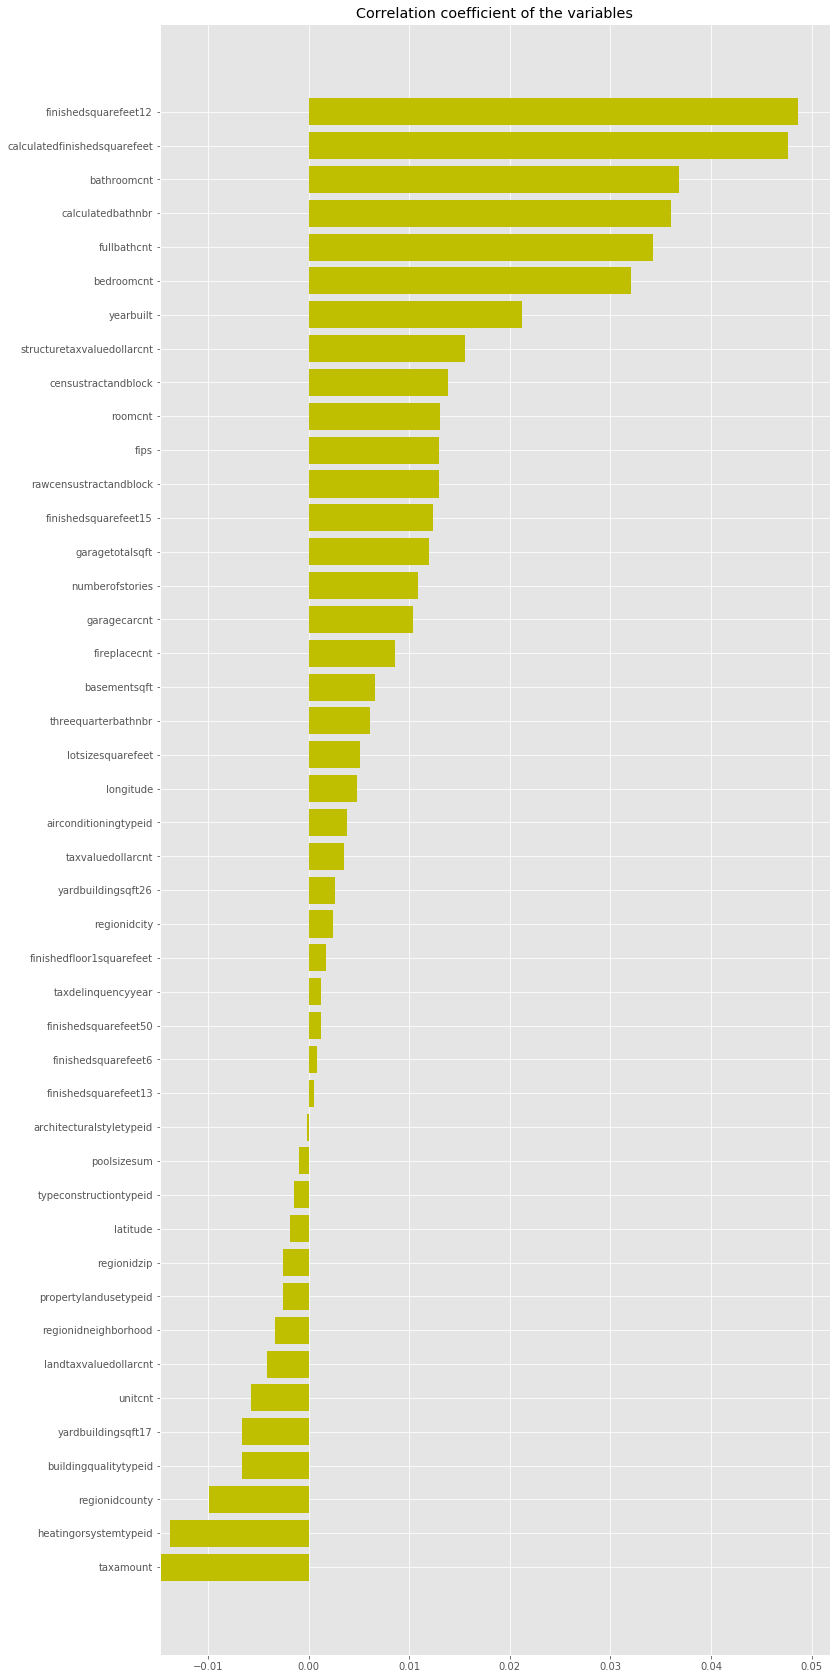

In [97]:
f, ax=plt.subplots(figsize=(12,30))
ax.barh(np.arange(corr_df.shape[0]), corr_df.corre, color='y')
ax.set_title('Correlation coefficient of the variables')
plt.yticks(np.arange(corr_df.shape[0]), corr_df.col_label)
plt.show()

In [100]:
train_df_new['pooltypeid7'].unique()

array([ 1.])

In [101]:
np.unique(train_df_new.pooltypeid7)

array([ 1.])

In [102]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


In [104]:
corr_df.rename(columns={'corre':'corr_values'}, inplace=True)
corr_df.columns

Index(['col_label', 'corr_values'], dtype='object')

In [105]:
corr_df[(corr_df.corr_values>0.02) | (corr_df.corr_values<-0.01)]

,col_label,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


In [116]:
corr_df_sel=corr_df[(corr_df.corr_values>0.02) | (corr_df.corr_values<-0.01)].reset_index(drop=True)
corr_df_sel

,col_label,corr_values
0,taxamount,-0.014768
1,heatingorsystemtypeid,-0.013732
2,yearbuilt,0.021171
3,bedroomcnt,0.032035
4,fullbathcnt,0.034267
5,calculatedbathnbr,0.036019
6,bathroomcnt,0.036862
7,calculatedfinishedsquarefeet,0.047659
8,finishedsquarefeet12,0.048611


In [117]:
corr_df[(corr_df.corr_values>0.02) | (corr_df.corr_values<-0.01)]

,col_label,corr_values
49,taxamount,-0.014768
21,heatingorsystemtypeid,-0.013732
43,yearbuilt,0.021171
4,bedroomcnt,0.032035
18,fullbathcnt,0.034267
7,calculatedbathnbr,0.036019
3,bathroomcnt,0.036862
10,calculatedfinishedsquarefeet,0.047659
11,finishedsquarefeet12,0.048611


In [118]:
corr_df_sel.col_label.tolist()

['taxamount',
 'heatingorsystemtypeid',
 'yearbuilt',
 'bedroomcnt',
 'fullbathcnt',
 'calculatedbathnbr',
 'bathroomcnt',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12']

In [126]:
corr_df_sel.col_label.values

array(['taxamount', 'heatingorsystemtypeid', 'yearbuilt', 'bedroomcnt',
       'fullbathcnt', 'calculatedbathnbr', 'bathroomcnt',
       'calculatedfinishedsquarefeet', 'finishedsquarefeet12'], dtype=object)

In [119]:
cols_to_use=corr_df_sel.col_label.tolist()
temp_df=train_df[cols_to_use]
corrmat=temp_df.corr(method='spearman')
corrmat

,taxamount,heatingorsystemtypeid,yearbuilt,bedroomcnt,fullbathcnt,calculatedbathnbr,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12
taxamount,1.000000,-0.221031,0.203550,0.285575,0.432514,0.455861,0.443505,0.516136,0.525372
heatingorsystemtypeid,-0.221031,1.000000,-0.532299,-0.215818,-0.526351,-0.515775,-0.515822,-0.405923,-0.407296
yearbuilt,0.203550,-0.532299,1.000000,0.056537,0.382029,0.444999,0.443699,0.226441,0.268134
bedroomcnt,0.285575,-0.215818,0.056537,1.000000,0.563227,0.564941,0.582353,0.703075,0.710859
fullbathcnt,0.432514,-0.526351,0.382029,0.563227,1.000000,0.966628,0.966628,0.736908,0.731116
calculatedbathnbr,0.455861,-0.515775,0.444999,0.564941,0.966628,1.000000,1.000000,0.761508,0.758102
bathroomcnt,0.443505,-0.515822,0.443699,0.582353,0.966628,1.000000,1.000000,0.744390,0.754414
calculatedfinishedsquarefeet,0.516136,-0.405923,0.226441,0.703075,0.736908,0.761508,0.744390,1.000000,1.000000
finishedsquarefeet12,0.525372,-0.407296,0.268134,0.710859,0.731116,0.758102,0.754414,1.000000,1.000000


In [124]:
tt_df=train_df[corr_df_sel.col_label.values]
tt_df.corr(method='spearman')

,taxamount,heatingorsystemtypeid,yearbuilt,bedroomcnt,fullbathcnt,calculatedbathnbr,bathroomcnt,calculatedfinishedsquarefeet,finishedsquarefeet12
taxamount,1.000000,-0.221031,0.203550,0.285575,0.432514,0.455861,0.443505,0.516136,0.525372
heatingorsystemtypeid,-0.221031,1.000000,-0.532299,-0.215818,-0.526351,-0.515775,-0.515822,-0.405923,-0.407296
yearbuilt,0.203550,-0.532299,1.000000,0.056537,0.382029,0.444999,0.443699,0.226441,0.268134
bedroomcnt,0.285575,-0.215818,0.056537,1.000000,0.563227,0.564941,0.582353,0.703075,0.710859
fullbathcnt,0.432514,-0.526351,0.382029,0.563227,1.000000,0.966628,0.966628,0.736908,0.731116
calculatedbathnbr,0.455861,-0.515775,0.444999,0.564941,0.966628,1.000000,1.000000,0.761508,0.758102
bathroomcnt,0.443505,-0.515822,0.443699,0.582353,0.966628,1.000000,1.000000,0.744390,0.754414
calculatedfinishedsquarefeet,0.516136,-0.405923,0.226441,0.703075,0.736908,0.761508,0.744390,1.000000,1.000000
finishedsquarefeet12,0.525372,-0.407296,0.268134,0.710859,0.731116,0.758102,0.754414,1.000000,1.000000


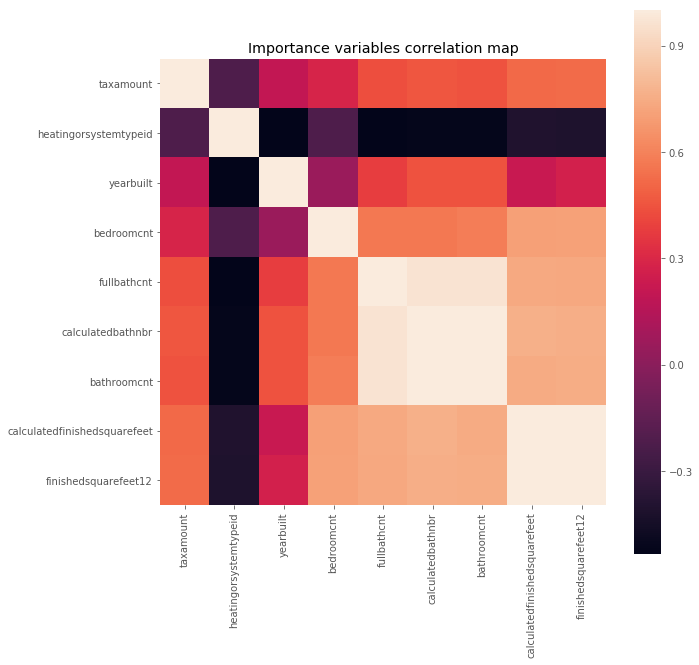

In [127]:
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=1, square=True).set_title("Importance variables correlation map")

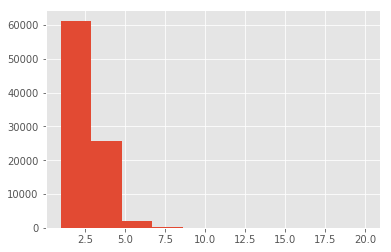

In [128]:
train_df.calculatedbathnbr.hist()

In [129]:
print(train_df.calculatedbathnbr.min(), train_df.calculatedbathnbr.max())
print(np.nanpercentile(train_df.calculatedbathnbr,99))
print(np.percentile(train_df.calculatedbathnbr,99))

1.0 20.0
5.5
nan


In [130]:
def draw_jointplot(col):
    ulimit=np.nanpercentile(train_df[col],99.5)
    llimit=np.nanpercentile(train_df[col],0.5)
    train_df[col][train_df[col]>ulimit]=ulimit
    train_df[col][train_df[col]<llimit]=llimit
    
    plt.figure(figsize=(10,10))
    sns.jointplot(train_df[col], train_df.logerror, size=10)
    plt.ylabel('Log error')
    plt.xlabel(col)
    plt.show()

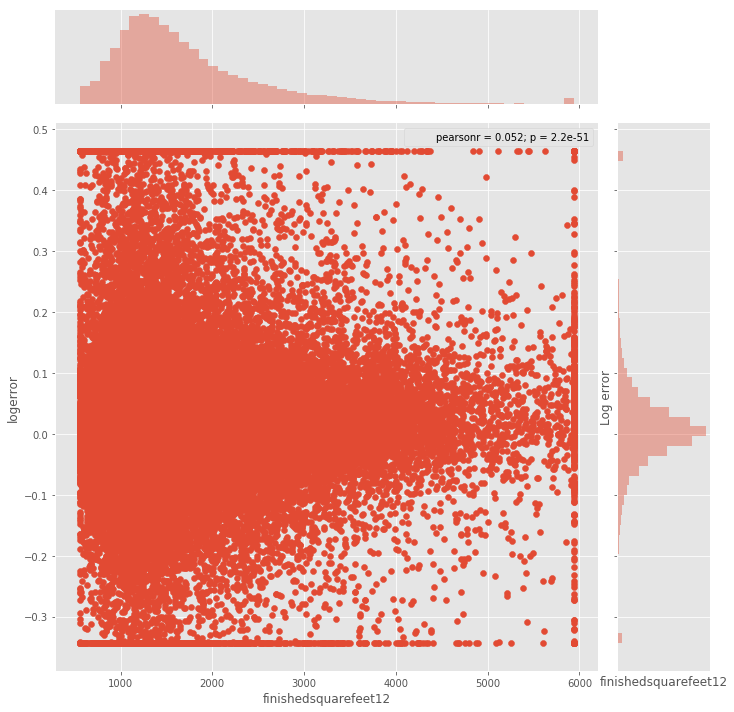

In [131]:
draw_jointplot('finishedsquarefeet12')

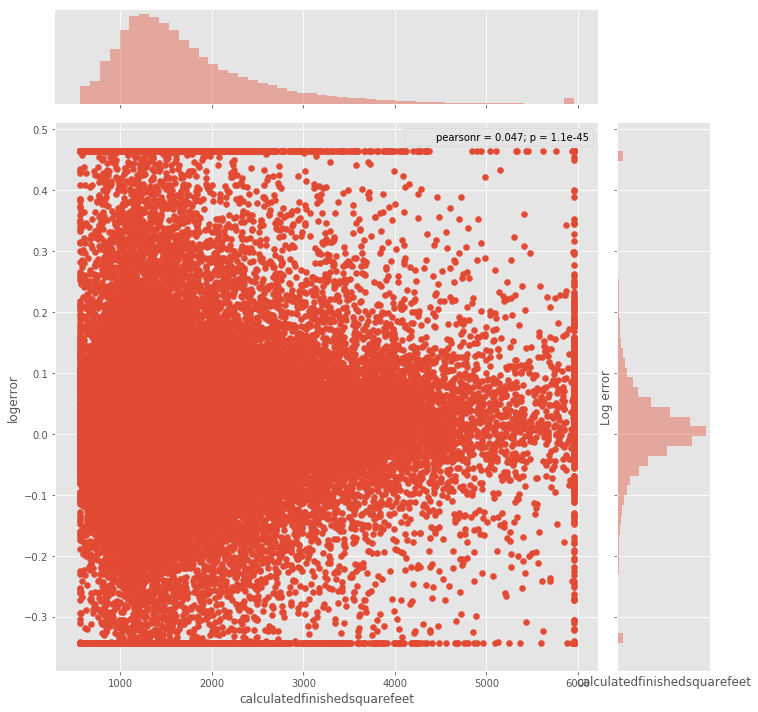

In [132]:
draw_jointplot('calculatedfinishedsquarefeet')

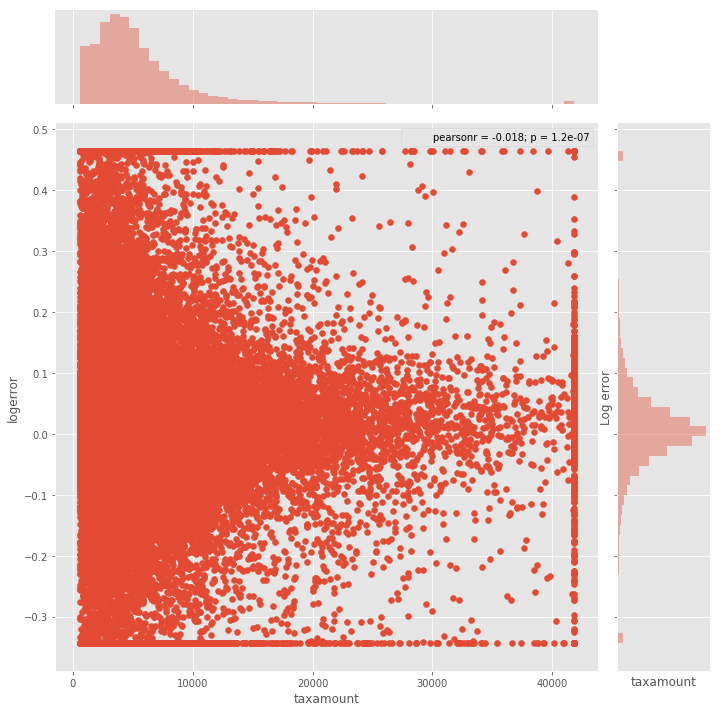

In [136]:
draw_jointplot('taxamount')

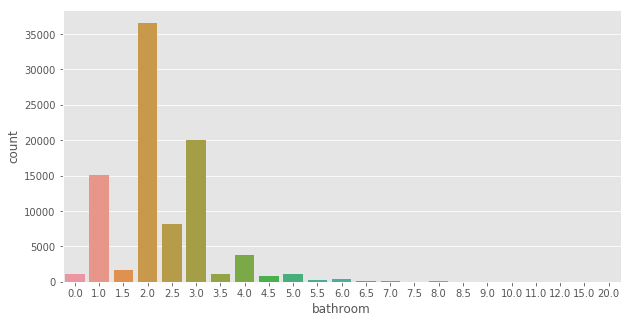

In [133]:
plt.figure(figsize=(10,5))
sns.countplot(train_df.bathroomcnt)
plt.ylabel("count")
plt.xlabel('bathroom')
plt.show()

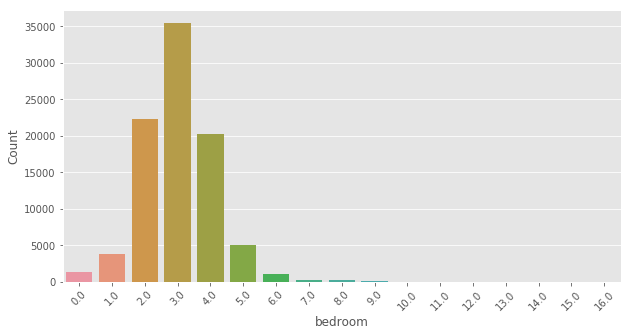

In [134]:
plt.figure(figsize=(10,5))
sns.countplot(train_df.bedroomcnt)
plt.ylabel('Count')
plt.xlabel('bedroom')
plt.xticks(rotation=45)
plt.show()

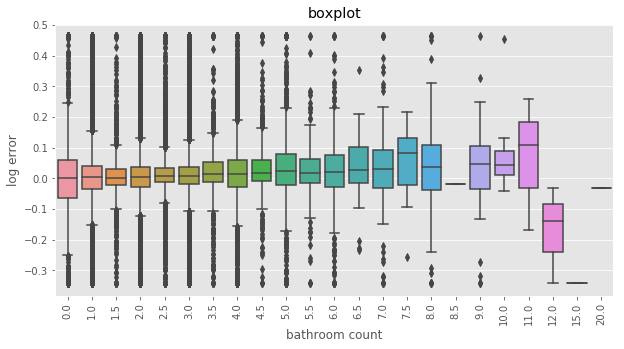

In [135]:
plt.figure(figsize=(10,5))
sns.boxplot(train_df.bathroomcnt, train_df.logerror)
plt.xlabel('bathroom count')
plt.ylabel('log error')
plt.xticks(rotation=90)
plt.title('boxplot')
plt.show()

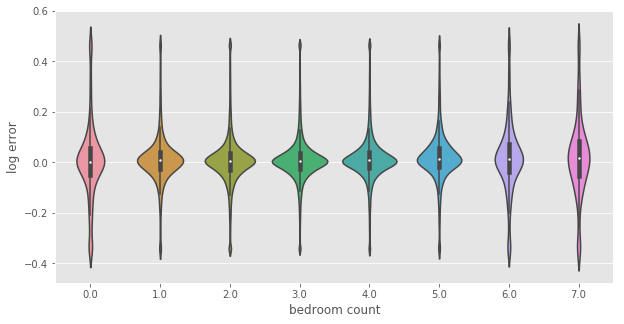

In [137]:
train_df.bedroomcnt[train_df.bedroomcnt>7]=7
plt.figure(figsize=(10,5))
sns.violinplot(train_df.bedroomcnt, train_df.logerror)
plt.xlabel('bedroom count')
plt.ylabel('log error')
plt.show()

In [138]:
from ggplot import *

ModuleNotFoundError: No module named 'ggplot'

In [139]:
y_train=train_df_new.logerror.values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]
x_train=train_df_new.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+cat_cols, axis=1)
x_train.shape

(90275, 52)

In [140]:
from sklearn.ensemble import ExtraTreesRegressor
tree=ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, random_state=0)
tree.fit(x_train.values, y_train.reshape(-1,1))

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=30,
          max_features=0.3, max_leaf_nodes=None, min_impurity_split=1e-07,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

In [141]:
importance=tree.feature_importances_

In [142]:
np.argsort(importance)

array([25, 29, 37, 27,  8, 28, 47,  5, 12, 39,  1, 42,  2, 16, 26, 33, 15,
       41,  9, 14, 38, 17, 44, 40, 19, 36, 13, 20, 21,  0, 18,  7,  3, 30,
        6, 50, 32, 34, 31, 51,  4, 35, 11, 23, 22, 10, 43, 46, 24, 48, 45,
       49], dtype=int64)

In [143]:
np.argsort(importance)[::-1]

array([49, 45, 48, 24, 46, 43, 10, 22, 23, 11, 35,  4, 51, 31, 34, 32, 50,
        6, 30,  3,  7, 18,  0, 21, 20, 13, 36, 19, 40, 44, 17, 38, 14,  9,
       41, 15, 33, 26, 16,  2, 42,  1, 39, 12,  5, 47, 28,  8, 27, 37, 29,
       25], dtype=int64)

In [144]:
len(tree.estimators_)

25

In [145]:
tree.estimators_

[ExtraTreeRegressor(criterion='mse', max_depth=30, max_features=0.3,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=209652396,
           splitter='random'),
 ExtraTreeRegressor(criterion='mse', max_depth=30, max_features=0.3,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=398764591,
           splitter='random'),
 ExtraTreeRegressor(criterion='mse', max_depth=30, max_features=0.3,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=924231285,
           splitter='random'),
 ExtraTreeRegressor(criterion='mse', max_depth=30, max_features=0.3,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split

In [146]:
imps=[t.feature_importances_ for t in tree.estimators_]
imps

[array([ 0.01477359,  0.00045872,  0.00088903,  0.00723281,  0.04510017,
         0.        ,  0.02064792,  0.0102012 ,  0.        ,  0.0044702 ,
         0.05420976,  0.04443482,  0.00047228,  0.01075758,  0.0036937 ,
         0.00194533,  0.00270848,  0.00742447,  0.00718967,  0.0101985 ,
         0.01415962,  0.01406331,  0.05630394,  0.05286663,  0.05837077,
         0.        ,  0.00243886,  0.        ,  0.        ,  0.        ,
         0.01851419,  0.03559002,  0.03246082,  0.00218396,  0.03273004,
         0.04242992,  0.00802451,  0.        ,  0.00266836,  0.00019923,
         0.00797876,  0.00336051,  0.00040039,  0.05435117,  0.00845605,
         0.0570368 ,  0.05653994,  0.        ,  0.05966959,  0.06967042,
         0.02380708,  0.03891688]),
 array([  1.38301804e-02,   4.12495862e-04,   3.48311684e-04,
          1.43396078e-02,   3.46034063e-02,   0.00000000e+00,
          2.10142415e-02,   1.55810052e-02,   0.00000000e+00,
          2.24186258e-03,   5.52972039e-02,   4.

In [149]:
type(imps)

list

In [147]:
np.sum(imps, axis=0)

array([ 0.34787049,  0.01203578,  0.02108788,  0.39870757,  1.00247315,
        0.        ,  0.45743359,  0.39147231,  0.        ,  0.09546889,
        1.35146517,  1.14674762,  0.00506795,  0.257047  ,  0.10008855,
        0.07803756,  0.03693513,  0.15864421,  0.36180142,  0.22402243,
        0.27662367,  0.32843187,  1.30615628,  1.3049095 ,  1.45879999,
        0.        ,  0.03912034,  0.        ,  0.        ,  0.        ,
        0.41847653,  0.87597247,  0.7986073 ,  0.04816822,  0.81876184,
        1.0196325 ,  0.23677585,  0.        ,  0.10261925,  0.00995136,
        0.21588724,  0.08938649,  0.01599558,  1.39551665,  0.18180585,
        1.50705239,  1.45777247,  0.        ,  1.46473477,  1.73619109,
        0.50479179,  0.94145202])

In [150]:
np.sum(imps, axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [151]:
std=np.std(imps, axis=0)
indices=np.argsort(importance)[::-1][:15]
indices

array([49, 45, 48, 24, 46, 43, 10, 22, 23, 11, 35,  4, 51, 31, 34], dtype=int64)

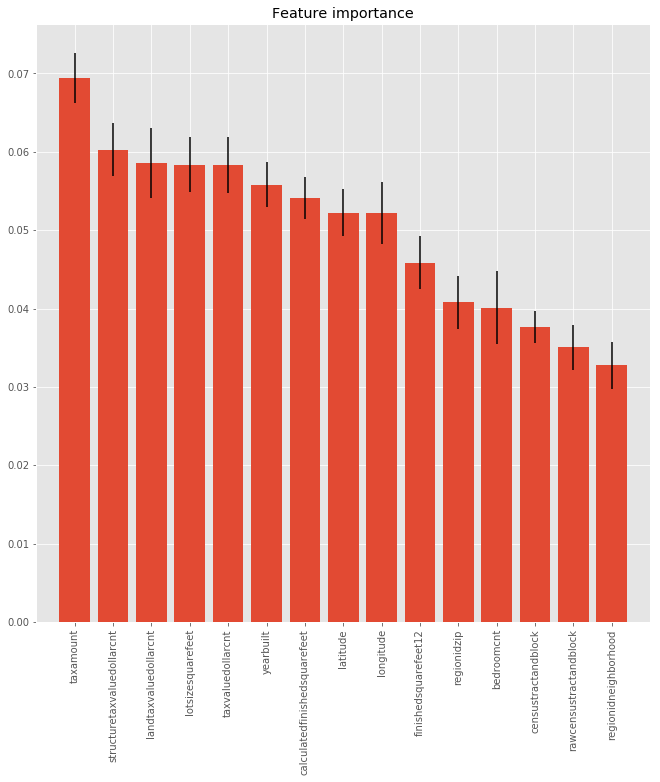

In [152]:

plt.figure(figsize=(11,11))
plt.bar(range(len(indices)), importance[indices], yerr=std[indices], align='center')
plt.title("Feature importance")
plt.xlim([-1, len(indices)])
plt.xticks(range(len(indices)), x_train.columns[indices], rotation=90)
plt.show()

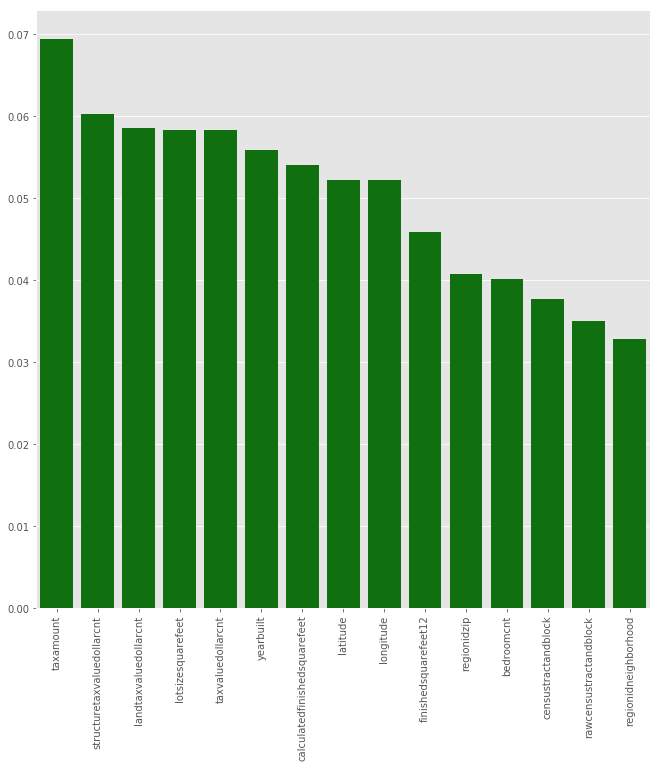

In [153]:
plt.figure(figsize=(11,11))
sns.barplot(x_train.columns[indices], importance[indices], color='g')
plt.xticks(rotation=90)
plt.show()